In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
ccdefault=pd.read_csv('../data//UCI_Credit_Card.csv')
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)


In [3]:
mcc = ccdefault.copy()
# Y Response variable dataframe
mcc_Y = mcc['DEFAULT']

# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['DEFAULT'],axis=1)
# Create inci_X Explanatory Variables DF to support the individual models
mcc_X = mcredit
mcc_X_knn = mcredit.copy()
mcc_X_nb = mcredit.copy()

In [4]:
cc = ccdefault.copy() # taking a copy in memory
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    #del cc['ID']
    del cc['DEFAULT']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


In [5]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


X_train_scaled1 = scl_obj.fit_transform(X_train) # apply to training
X_test_scaled1 = scl_obj.fit_transform(X_test) # apply those means and std to the test set (without snooping at the test set values)



In [6]:
decision_tree =  DecisionTreeClassifier( ) # get object, the 'C' value is less (can you guess why??)
decision_tree.fit(X_train_scaled,y_train)  # train object

y_hat = decision_tree.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

# sort these attributes and spit them out
zip_vars = zip(decision_tree.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

accuracy: 0.725
[[3803  870]
 [ 780  547]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000

PAY_5 has weight of 0.010660420772406731
PAY_4 has weight of 0.01255350612800401
PAY_6 has weight of 0.013904140765894284
PAY_3 has weight of 0.014741397891235047
MARRIAGE has weight of 0.015100421804616817
SEX has weight of 0.01650111101163539
EDUCATION has weight of 0.021088792717406903
PAY_2 has weight of 0.038664938600035115
PAY_AMT5 has weight of 0.05808214612323643
PAY_AMT4 has weight of 0.061607282086700015
LIMIT_BAL has weight of 0.06289855286961316
PAY_AMT6 has weight of 0.0642446937157768
PAY_AMT1 has weight of 0.07038887965216091
PAY_AMT3 has weight of 0.0799923808698593
PAY_AMT2 has weight of 0.0825313228249130

In [7]:
iter_num=0
times_rec=[]
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
     #we count the time in executing the  decision tree classifier 
    t0 = time()
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train,y_train)  # train object
    y_hat = decision_tree.predict(X_test) # get test set precitions
    
    t1=time()
    diff=np.array([t1-t0])
    
    print ("The time it takes to fit and predict is " + str(diff[0]) + "\n")    
    times_rec=np.append(times_rec,diff)
    

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    print("\n *** CLASSIFICATION REPORT ****")
    #### CLASSIFICATION REPORT
    ClassReport = mt.classification_report(y_test,y_hat)
    print(ClassReport)
    
    iter_num+=1
    
    
print("The average time to fit and predict 3 Decision Tree classifiers  with 80/20 training/test split is: " + str(times_rec.mean()) )

The time it takes to fit and predict is 0.3196861743927002

====Iteration 0  ====
accuracy 0.7335
confusion matrix
 [[3847  826]
 [ 773  554]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4673
           1       0.40      0.42      0.41      1327

    accuracy                           0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.73      0.74      6000

The time it takes to fit and predict is 0.30170202255249023

====Iteration 1  ====
accuracy 0.7213333333333334
confusion matrix
 [[3787  886]
 [ 786  541]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.38      0.41      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72   

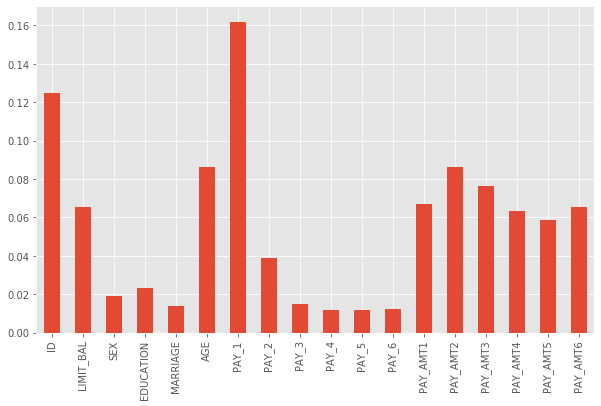

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10,6))
weights = pd.Series(decision_tree.feature_importances_,index=cc.columns)
weights.plot(kind='bar')
plt.show()

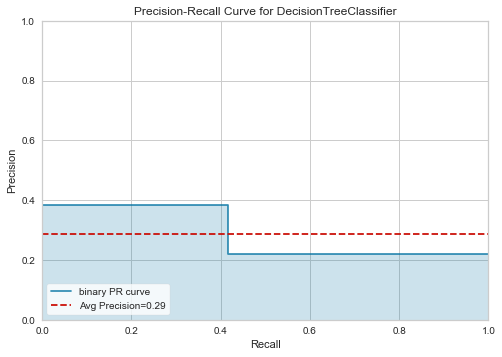

In [9]:
from yellowbrick.classifier import PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(decision_tree)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

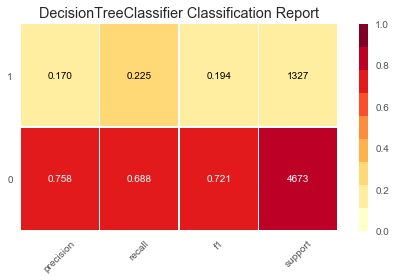

In [18]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(decision_tree,   support=True, class_weight='balanced'   )

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

confusion matrix For decision tree model 


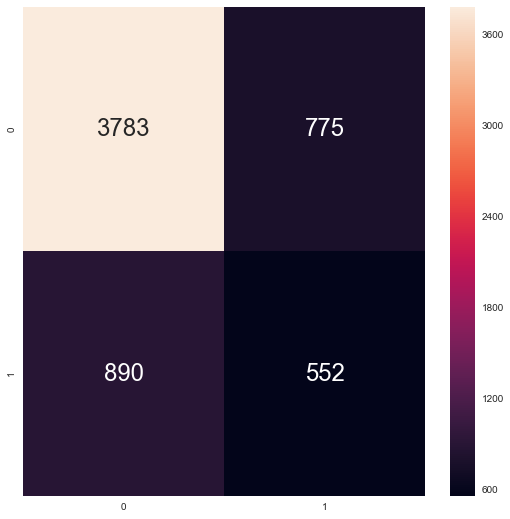

In [10]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For decision tree model ')
#print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')


In [11]:
decision_tree =  DecisionTreeClassifier( class_weight='balanced') # get object, the 'C' value is less (can you guess why??)
decision_tree.fit(X_train_scaled,y_train)  # train object

y_hat = decision_tree.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )
ClassReport = mt.classification_report(y_test,y_hat)
print(ClassReport)

# sort these attributes and spit them out
zip_vars = zip(decision_tree.feature_importances_ ,cc.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef) # now print them out

accuracy: 0.7335
[[3859  814]
 [ 785  542]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4673
           1       0.40      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.74      0.73      0.73      6000

PAY_5 has weight of 0.008868724474946839
SEX has weight of 0.010930084600559796
PAY_6 has weight of 0.012465313441523266
MARRIAGE has weight of 0.013056389673668083
PAY_3 has weight of 0.013068574585415438
PAY_2 has weight of 0.013254974660730941
PAY_4 has weight of 0.014587568263998285
EDUCATION has weight of 0.02298974308285607
PAY_AMT5 has weight of 0.06330135933110735
PAY_AMT6 has weight of 0.06498322511501627
PAY_AMT3 has weight of 0.06753229057380752
LIMIT_BAL has weight of 0.07284450239393206
PAY_AMT4 has weight of 0.07690300886381005
PAY_AMT1 has weight of 0.07967974243871527
PAY_AMT2 has weight of 0.0839488418062

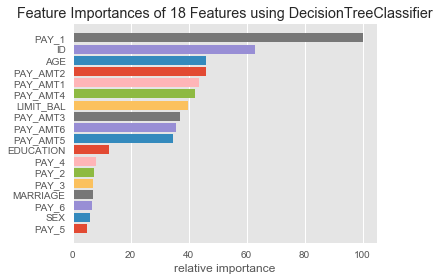

In [19]:
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set

viz = FeatureImportances(decision_tree, labels = cc.columns)
viz.fit(X_train_scaled,y_train)
viz.show()

confusion matrix For decision tree model 


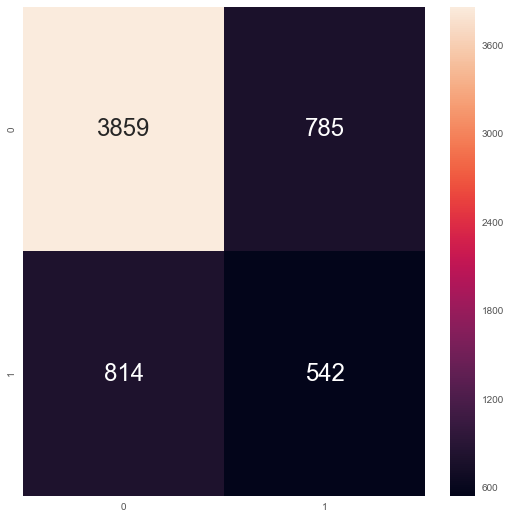

In [23]:
cm = confusion_matrix(y_hat, y_test)
plt.figure(figsize=(9,9))
print ('confusion matrix For decision tree model ')
#print(cm)
sns.heatmap(cm, annot= True, annot_kws={"size": 24}, fmt = 'd')


In [28]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [29]:
graph.render()

'iris.pdf'

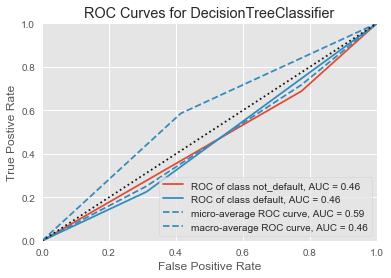

In [30]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(decision_tree, classes=["not_default", "default"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 